In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:2]
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

C:\Users\Pedro\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


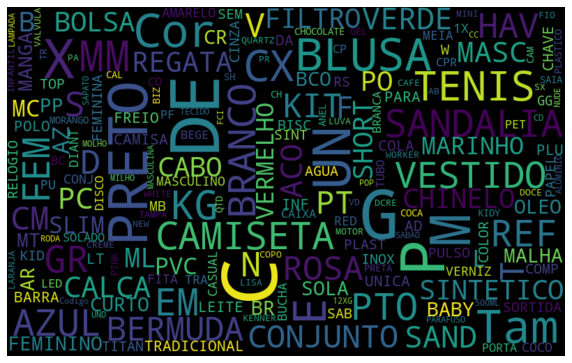

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([descricao for descricao in df.descricao_item ])

nuvem_descricao = WordCloud(width= 800, height= 500, 
                            max_font_size= 110,
                            collocations= False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_descricao,interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='ncm'>

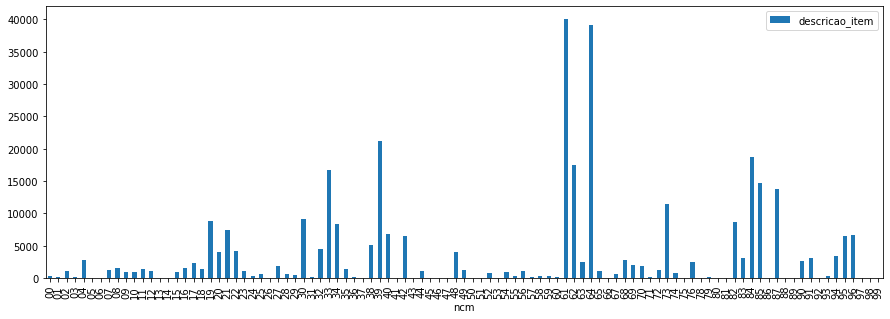

In [4]:
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [5]:
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [6]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 19
entre 5000 e 1000 31
abaixo de 1000 49


In [7]:
#DROP menores que 1000
for i in less1000:
   df.drop(df.loc[df['ncm'] == i].index, inplace=True)

In [8]:
import pandas as pd
import numpy as np


for i in over5000: 
    remove_n = len(df.loc[df['ncm'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['ncm'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [9]:
df = df.reset_index()
df

,index,descricao_item,ncm
0,5,DISPLAY TOTEN PS MARLUVAS PES,49
1,16,OIL E7 15W GRANEL DEP,27
2,23,CS K BB CS TINTA 2L PRETA,32
3,48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65
4,68,Livro IM Interativo Coreldraw x,49
...,...,...,...
160960,343242,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87
160961,343243,"ZINCO 100CM 3,50KG P MT CP",72
160962,343244,ZMM 9010811 ALTERNADOR 12V AMP,85
160963,343245,ZORDS COM FIGURA E,95


In [10]:
df = df.drop(columns=['index'])

<AxesSubplot:xlabel='ncm'>

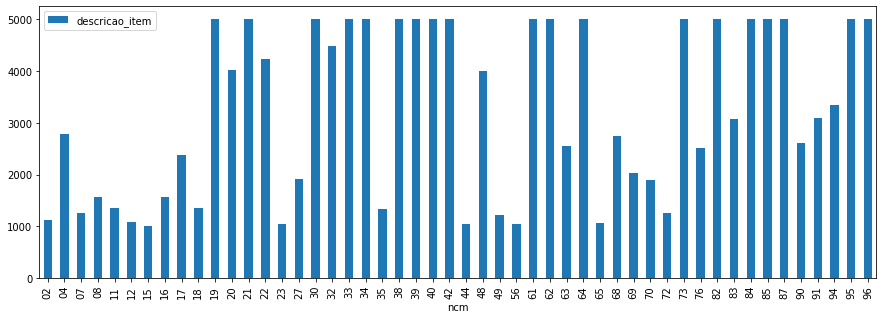

In [11]:
df_group_nw = df.groupby('ncm').count()
df_group_nw
df_group_nw.plot.bar( figsize=(15, 5))

In [12]:
df.dropna()

,descricao_item,ncm
0,DISPLAY TOTEN PS MARLUVAS PES,49
1,OIL E7 15W GRANEL DEP,27
2,CS K BB CS TINTA 2L PRETA,32
3,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65
4,Livro IM Interativo Coreldraw x,49
...,...,...
160960,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87
160961,"ZINCO 100CM 3,50KG P MT CP",72
160962,ZMM 9010811 ALTERNADOR 12V AMP,85
160963,ZORDS COM FIGURA E,95


In [14]:
palavras_final = []
for i in range(len(df['descricao_item'])): 
    produto = df['descricao_item'].iloc[i]
    sentencas = nltk.sent_tokenize(produto)
    palavras = nltk.word_tokenize(produto.upper())
    stemmer = nltk.stem.RSLPStemmer()
    palavras_stem = []
    for palavra in palavras:
        palavras_stem.append(stemmer.stem(palavra))
    palavras_sem_stopwords = [palavras_stem for palavras_stem in palavras_stem if palavras_stem not in stopwords]
    palavra_final = ' '.join(palavras_sem_stopwords)
    palavras_final.append(palavra_final)
x = pd.Series(palavras_final)
df['descricao_item_clean'] = x

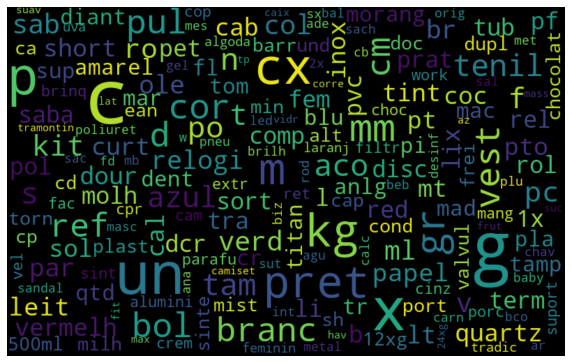

In [15]:
todas_palavras = ' '.join([descricao for descricao in df.descricao_item_clean ])

nuvem_descricao = WordCloud(width= 800, height= 500, 
                            max_font_size= 110,
                            collocations= False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_descricao,interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item_clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=123, test_size=0.2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels_enc = LabelEncoder()
y_train_labels_fit = labels_enc.fit(y_train)
y_train_lables_trf = labels_enc.transform(y_train)

#print(labels.classes_)

In [17]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train)

In [18]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf.predict(p_tfidf)
y_pred = y_pred.astype(int)

In [19]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.87      0.92      0.90       219
           4       0.90      0.92      0.91       567
           7       0.84      0.88      0.86       249
           8       0.85      0.93      0.89       333
          11       0.86      0.91      0.89       268
          12       0.91      0.89      0.90       237
          15       0.82      0.68      0.75       186
          16       0.91      0.93      0.92       325
          17       0.91      0.92      0.91       498
          18       0.84      0.92      0.88       280
          19       0.91      0.92      0.91      1019
          20       0.86      0.84      0.85       790
          21       0.89      0.88      0.89       981
          22       0.84      0.68      0.75       859
          23       0.89      0.91      0.90       225
          27       0.87      0.81      0.84       405
          30       0.85      0.79      0.81       962
          32       0.82    